Answer These Questions

1.) What was the change in price of the stock over time?
2.) What was the daily return of the stock on average?
3.) What was the moving average of the various stocks?
4.) What was the correlation between different stocks' closing prices?
4.) What was the correlation between different stocks' daily returns?
5.) How much value do we put at risk by investing in a particular stock?
6.) How can we attempt to predict future stock behavior?

In [4]:
import pandas as pd
import numpy as np
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid') #for white grid background
%matplotlib inline


In [5]:
from pandas.io.data import DataReader

In [6]:
from datetime import datetime

In [7]:
from __future__ import division  #for floating numbers


In [8]:
tech_list=['AAPL','GOOG','MSFT','AMZN']  #

In [9]:
end = datetime.now()  #set end date
start = datetime(end.year-1,end.month,end.day) #start date


In [10]:
for stock in tech_list:
    globals()[stock] = DataReader(stock,'yahoo',start,end)
    #taking stock ticker to make a global variable and allows to make a dataframe variable example below

In [11]:
AAPL.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2015-03-02,129.250000,130.279999,128.300003,129.089996,48096700,126.740569
2015-03-03,128.960007,129.520004,128.089996,129.360001,37816300,127.005659
2015-03-04,129.100006,129.559998,128.320007,128.539993,31666300,126.200576
2015-03-05,128.580002,128.750000,125.760002,126.410004,56517100,124.109352
2015-03-06,128.399994,129.369995,126.260002,126.599998,72842100,124.295889


In [12]:
AAPL.describe()

,Open,High,Low,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000
mean,116.887549,117.968972,115.587194,116.757510,5.039283e+07,115.466699
std,11.051257,10.857779,11.175977,10.970546,2.057328e+07,10.355177
min,93.129997,94.500000,92.000000,93.419998,1.304640e+07,92.915814
25%,110.800003,111.900002,109.129997,110.379997,3.636510e+07,109.316344
50%,117.639999,119.230003,116.529999,118.029999,4.616470e+07,117.174181
75%,126.430000,127.290001,125.620003,126.440002,5.623850e+07,124.295889
max,134.460007,134.539993,131.399994,132.649994,1.622063e+08,130.671320


In [13]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2015-03-02 to 2016-03-01
Data columns (total 6 columns):
Open         253 non-null float64
High         253 non-null float64
Low          253 non-null float64
Close        253 non-null float64
Volume       253 non-null int64
Adj Close    253 non-null float64
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


In [14]:
# historical view of closing price

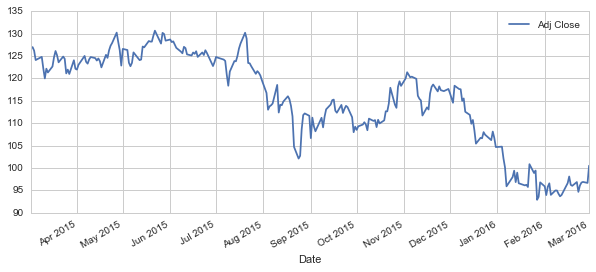

In [15]:
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

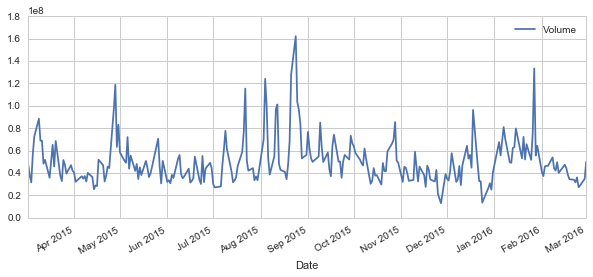

In [16]:
# total volume of stock traded each day in the past year
AAPL['Volume'].plot(legend=True,figsize = (10,4))

In [17]:
# several moving average of 3 days of stock
# In statistics, a moving average (rolling average or running average)
# is a calculation to analyze data points by creating series of averages of different subsets of the full data set. 

In [18]:
ma_day =[10,20,50] #correspond as a day
for ma in ma_day:
    column_name = "MA for %s days"%(str(ma))
    
    AAPL[column_name]= pd.rolling_mean(AAPL['Adj Close'],ma)  #pass columne name and number of days

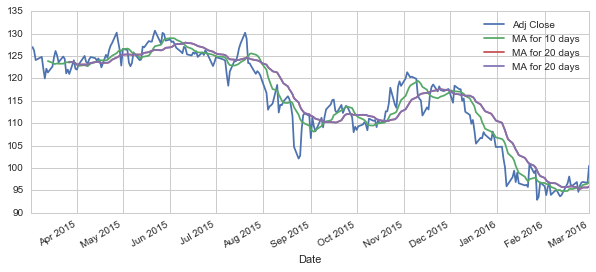

In [19]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 20 days']].plot(subplots=False,figsize=(10,4))

In [20]:
# Analyze Daily Returns and Risk Analysis of APPLE

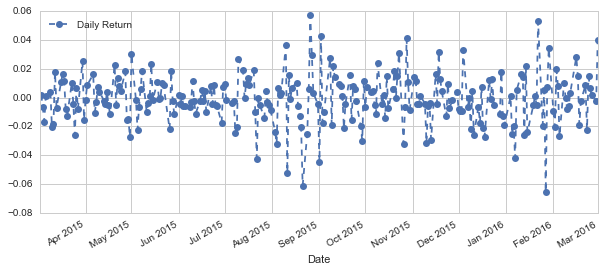

In [21]:
#set new columne name as Daily return with percent change of the Adj Closing Price
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change() 
AAPL['Daily Return'].plot(figsize = (10,4),legend=True, linestyle='--',marker='o') 

In [22]:
AAPL.head()

,Open,High,Low,Close,Volume,Adj Close,MA for 10 days,MA for 20 days,MA for 50 days,Daily Return
Date,,,,,,,,,,
2015-03-02,129.250000,130.279999,128.300003,129.089996,48096700,126.740569,NaN,NaN,NaN,NaN
2015-03-03,128.960007,129.520004,128.089996,129.360001,37816300,127.005659,NaN,NaN,NaN,0.002092
2015-03-04,129.100006,129.559998,128.320007,128.539993,31666300,126.200576,NaN,NaN,NaN,-0.006339
2015-03-05,128.580002,128.750000,125.760002,126.410004,56517100,124.109352,NaN,NaN,NaN,-0.016571
2015-03-06,128.399994,129.369995,126.260002,126.599998,72842100,124.295889,NaN,NaN,NaN,0.001503


In [23]:
# Average daily return of the pas year

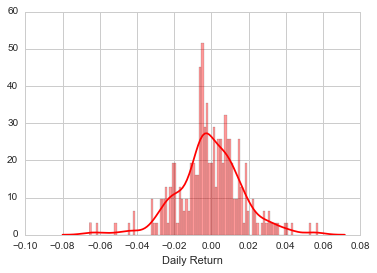

In [24]:
# distplot allows to use to place two plots together
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='red')

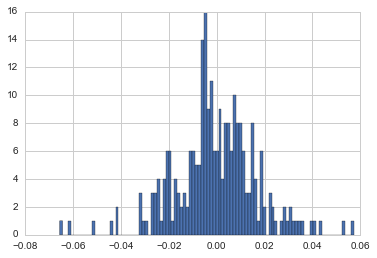

In [25]:
# alternative way with pandas built in histogram
AAPL['Daily Return'].hist(bins=100)

In [26]:
# analyse the returns of all the stock in our list 

In [27]:
# New dataframe from yahoo with start and grab just the Adj Closing Column
closing_df = DataReader(tech_list,'yahoo',start,end)['Adj Close']

In [28]:
closing_df.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2015-03-02,126.740569,385.660004,571.342601,42.714399
2015-03-03,127.005659,384.609985,573.642610,42.130335
2015-03-04,126.200576,382.720001,573.372583,41.916181
2015-03-05,124.109352,387.829987,575.332609,41.964852
2015-03-06,124.295889,380.089996,567.687558,41.234775


In [29]:
# get daily returns from our stock and do the percent change and put it into new df
tech_returns = closing_df.pct_change()

In [30]:
tech_returns.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,0.002092,-0.002723,0.004026,-0.013674
2015-03-04,-0.006339,-0.004914,-0.000471,-0.005083
2015-03-05,-0.016571,0.013352,0.003418,0.001161
2015-03-06,0.001503,-0.019957,-0.013288,-0.017397


In [31]:
# compare two daily returns of the stock this time with google itself

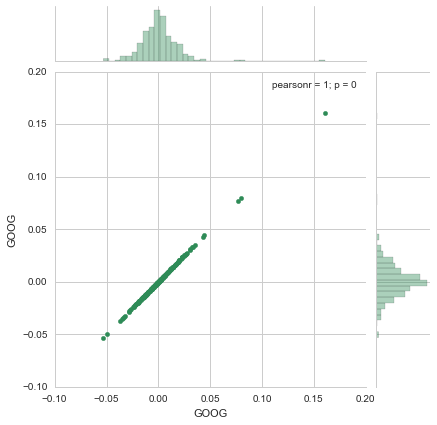

In [32]:
sns.jointplot('GOOG','GOOG',tech_returns,kind='scatter',color='seagreen')

In [33]:
# know more about pearsonr value
# In statistics, the Pearson product-moment correlation coefficient (/ˈpɪərsᵻn/)
# (sometimes referred to as the PPMCC or PCC or Pearson's r) 
# is a measure of the linear correlation between two variables X and Y, 
# giving a value between +1 and −1 inclusive, where 1 is total positive correlation,
# 0 is no correlation, and −1 is total negative correlation


/usr/local/lib/python2.7/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


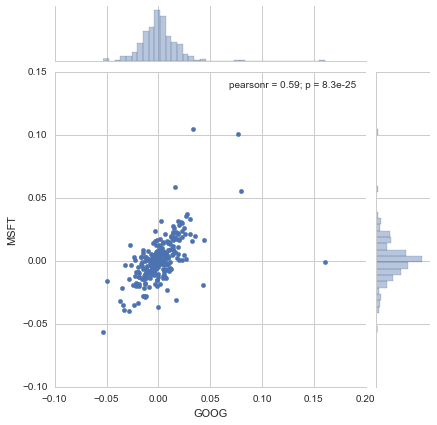

In [34]:
# compare to different stocks
sns.jointplot('GOOG','MSFT',tech_returns,kind='scatter')

In [35]:
# pairplot

In [36]:
tech_returns.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,0.002092,-0.002723,0.004026,-0.013674
2015-03-04,-0.006339,-0.004914,-0.000471,-0.005083
2015-03-05,-0.016571,0.013352,0.003418,0.001161
2015-03-06,0.001503,-0.019957,-0.013288,-0.017397


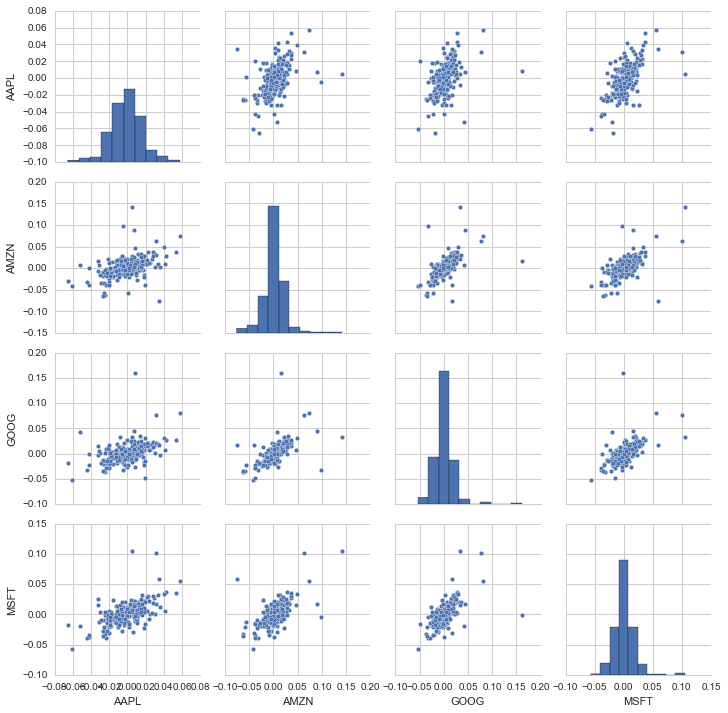

In [37]:
sns.pairplot(tech_returns.dropna())

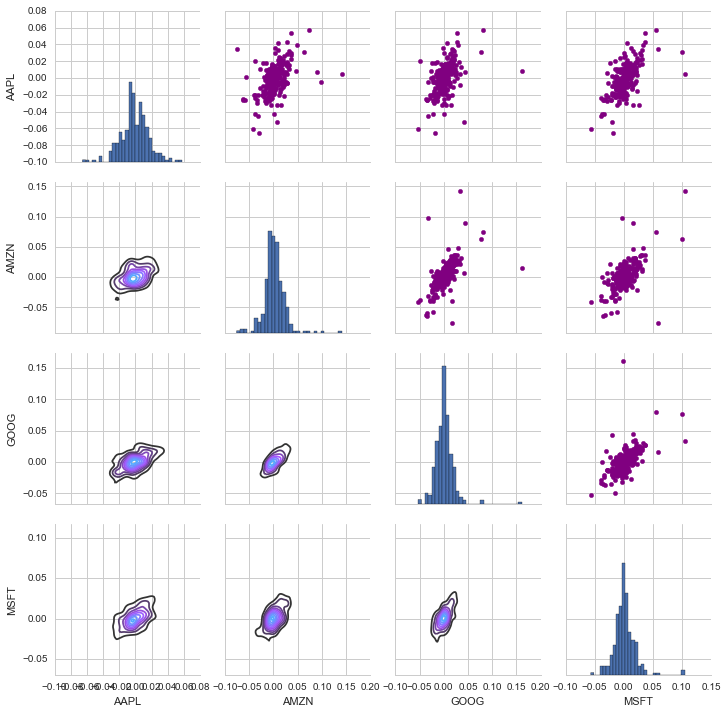

In [38]:
# more control in the figure
# create a figure

returns_fig = sns.PairGrid(tech_returns.dropna())
# pass 3 methods upper, lower and diagonal
returns_fig.map_upper(plt.scatter,color='purple')
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=30)

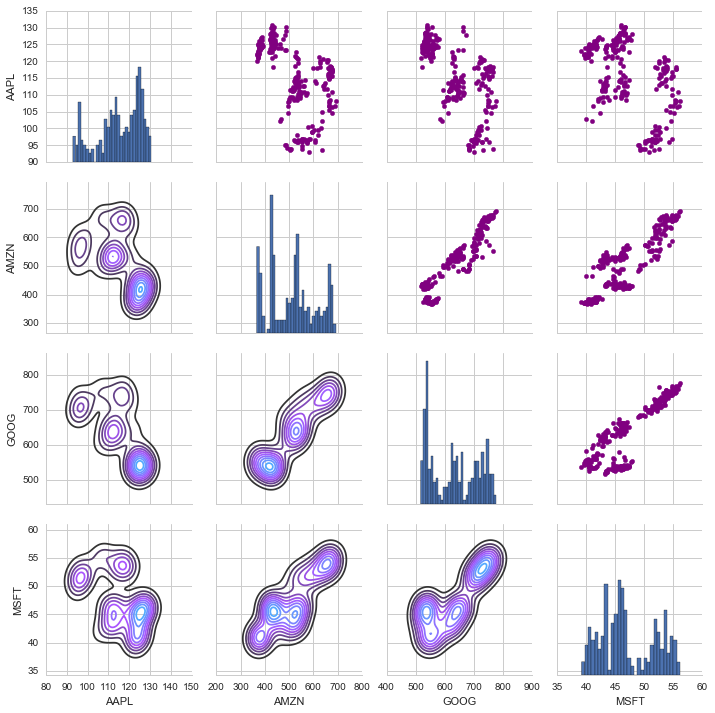

In [39]:
# corelation between closing price
# more control in the figure
# create a figure

returns_fig = sns.PairGrid(closing_df)
# pass 3 methods upper, lower and diagonal
returns_fig.map_upper(plt.scatter,color='purple')
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=30)

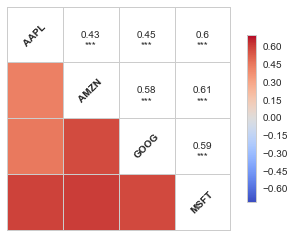

In [45]:
# actual numercial value of corelation with seaborn for dailyreturns
sns.corrplot(tech_returns.dropna(),annot=True)

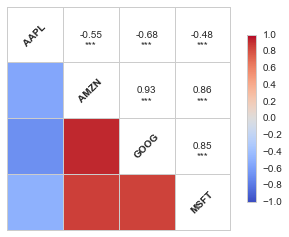

In [46]:
# for closing prices
sns.corrplot(closing_df,annot=True)

In [47]:
# stock and its risk analysing

rets = tech_returns.dropna()

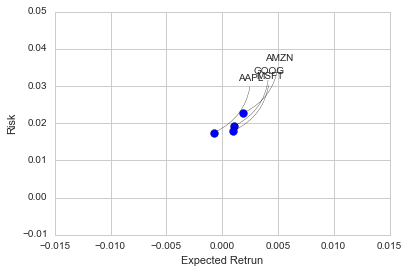

In [48]:
# Use annotation to label
area = np.pi*20 #setting the area of the circle of scatter plot

plt.scatter(rets.mean(),rets.std(),s =area)
# set x and y label
plt.xlabel('Expected Retrun')
plt.ylabel('Risk')

for label,x,y in zip(rets.columns,rets.mean(),rets.std()):
    plt.annotate(
    label,
    xy =(x,y),xytext=(50,50),
        textcoords='offset points', ha ='right',va ='bottom',
        arrowprops = dict(arrowstyle='-',connectionstyle ='arc3,rad=-0.3'))

Value at Risk with montecarlo method
Image result for monte carlo method 
A Monte Carlo method is a technique that involves using random numbers and probability to solve problems. 
The term Monte Carlo Method was coined by S. Ulam and Nicholas Metropolis in reference to games of chance, 
a popular attraction in Monte Carlo, Monaco (Hoffman, 1998; Metropolis and Ulam, 1949).


Quantile
Quantiles are cutpoints dividing a set of observations into equal sized groups.
There are one fewer quantiles than the number of groups created.
Thus quartiles are the 3 cut points that will divide a dataset into four equal-size groups.

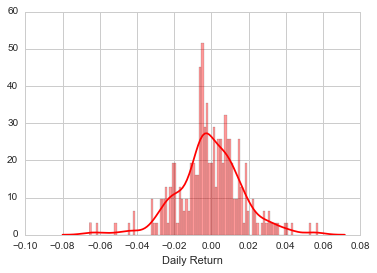

In [49]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='red')

In [50]:
# pandas quanitle to see the risk value of stock
rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2015-03-03,0.002092,-0.002723,0.004026,-0.013674
2015-03-04,-0.006339,-0.004914,-0.000471,-0.005083
2015-03-05,-0.016571,0.013352,0.003418,0.001161
2015-03-06,0.001503,-0.019957,-0.013288,-0.017397
2015-03-09,0.004265,-0.004025,0.002052,0.011567


In [51]:
rets['AAPL'].quantile(0.05)

-0.026870597580305255

The 0.05 empirical quantile of daily returns is at -0.026888 That means that with 95% confidence, our worst daily loss will not exceed 2.7%. If we have a 1 million dollar investment, our one-day 5% VaR is 0.026 * 1,000,000 = $26,000.

Go ahead and repeat this for the other stocks in out portfolio, then afterwards we'll look at value at risk by implementing a Monte Carlo method.

In [52]:
# With monte carlo method risk analysis

In [53]:
# set time horizon
days =365
dt = 1/days

mu = rets.mean()['GOOG']  #is associated with drift - average
sigma = rets.std()['GOOG'] #Sigma as volatility of stock


http://www.investopedia.com/articles/07/montecarlo.asp


In [63]:
def stock_monte_carlo(start_price,days,mu,sigma):
    price=np.zeros(days)
    price[0]= start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
#     Run price array
    for x in xrange(1,days):
        shock[x]=np.random.normal(loc=mu*dt,scale=sigma*np.sqrt(dt))
        drift[x]=mu*dt
        price[x]=price[x-1]+(price[x-1]*(drift[x]+shock[x]))
        
    return price

In [62]:
GOOG.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2015-03-02,560.532559,572.152562,558.752531,571.342601,2129600,571.342601
2015-03-03,570.452587,575.392588,566.522559,573.642610,1704700,573.642610
2015-03-04,571.872619,577.112637,568.012546,573.372583,1876800,573.372583
2015-03-05,575.022616,577.912621,573.412609,575.332609,1389600,575.332609
2015-03-06,574.882583,576.682625,566.762536,567.687558,1659100,567.687558


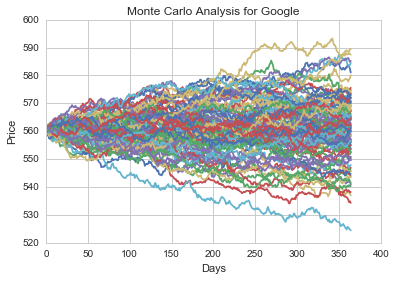

In [64]:
# set the start price
start_price =560.53
# run the montecarlo for 100 times and plot it accordingly
for run in xrange(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Google')

In [65]:
#large simulation
runs =10000
simulations = np.zeros(runs)

for run in xrange(runs):
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

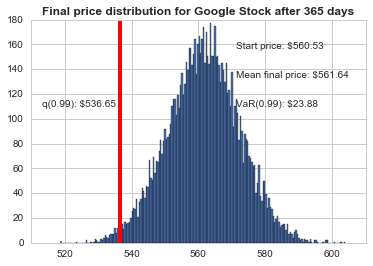

In [66]:
# quantile to define the risk of the stock
# define 1 percent imperical quantile - 99 % of output
q =np.percentile(simulations,1) 
plt.hist(simulations,bins=200)

# Starting Price
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Google Stock after %s days" % days, weight='bold');

Awesome! Now we have looked at the 1% empirical quantile of the final price distribution to estimate the Value at Risk for the Google stock, which looks to be $23.88 for every investment of 569.85 (the price of one inital google stock).

This basically menas for every initial stock you purchase your putting about $23.88 at risk 99% of the time from our Monte Carlo Simulation.

#TODO

1.) Estimate the values at risk using both methods we learned in this project for a stock not related to technology.

2.) Build a practice portfolio and see how well you can predict you risk values with real stock information!

3.) Look further into correlatino of two stocks and see if that gives you any insight into future possible stock prices.
#Tesla Vs Gasoline
#Todo exxon Mobil vs Tesla